In [74]:
# 
import json
import cv2
from tencentcloud.common import credential
from tencentcloud.common.profile.client_profile import ClientProfile
from tencentcloud.common.profile.http_profile import HttpProfile
from tencentcloud.common.exception.tencent_cloud_sdk_exception import TencentCloudSDKException
from tencentcloud.iai.v20200303 import iai_client, models
import base64
import matplotlib.pyplot as plt
%matplotlib inline
with open("../tencent_key.json" ,'r') as key:
    SecretDict=json.loads(key.read())
SecretId=SecretDict["SecretId"]
SecretKey=SecretDict["SecretKey"]

In [126]:
"""
https://cloud.tencent.com/document/product/867/44989
"""
try: 
    cred = credential.Credential(SecretId, SecretKey) 
    httpProfile = HttpProfile()
    httpProfile.endpoint = "iai.tencentcloudapi.com"
    
    clientProfile = ClientProfile()
    clientProfile.httpProfile = httpProfile
    client = iai_client.IaiClient(cred, "ap-beijing", clientProfile) 
    with open("./images/test2.jpg","rb") as file:
        img=base64.b64encode(file.read()) 
        
        
    req = models.AnalyzeFaceRequest()
    params = {
        "Image": str(img, encoding='utf-8'), 
        "Mode": 0, # 检测模式。0 为检测所有出现的人脸， 1 为检测面积最大的人脸。默认为 0。
                        # 最多返回 10 张人脸的五官定位（人脸关键点）具体信息。
        "NeedRotateDetection": 0 # 是否开启图片旋转识别支持。0为不开启，1为开启。
    }
    req.from_json_string(json.dumps(params))

    resp = client.AnalyzeFace(req).to_json_string()
    resp=json.loads(resp)
    print(resp) 
except TencentCloudSDKException as err: 
    print(err) 

{'ImageWidth': 300, 'ImageHeight': 300, 'FaceShapeSet': [{'FaceProfile': [{'X': 77, 'Y': 164}, {'X': 77, 'Y': 176}, {'X': 79, 'Y': 187}, {'X': 83, 'Y': 198}, {'X': 88, 'Y': 209}, {'X': 94, 'Y': 219}, {'X': 100, 'Y': 228}, {'X': 107, 'Y': 237}, {'X': 114, 'Y': 246}, {'X': 121, 'Y': 255}, {'X': 131, 'Y': 260}, {'X': 146, 'Y': 260}, {'X': 160, 'Y': 254}, {'X': 173, 'Y': 246}, {'X': 185, 'Y': 237}, {'X': 195, 'Y': 225}, {'X': 202, 'Y': 212}, {'X': 206, 'Y': 197}, {'X': 207, 'Y': 182}, {'X': 207, 'Y': 167}, {'X': 207, 'Y': 152}], 'LeftEye': [{'X': 81, 'Y': 163}, {'X': 85, 'Y': 166}, {'X': 90, 'Y': 167}, {'X': 95, 'Y': 167}, {'X': 100, 'Y': 165}, {'X': 97, 'Y': 159}, {'X': 91, 'Y': 157}, {'X': 84, 'Y': 158}], 'RightEye': [{'X': 163, 'Y': 156}, {'X': 158, 'Y': 160}, {'X': 152, 'Y': 162}, {'X': 145, 'Y': 162}, {'X': 139, 'Y': 162}, {'X': 143, 'Y': 155}, {'X': 149, 'Y': 151}, {'X': 157, 'Y': 151}], 'LeftEyeBrow': [{'X': 72, 'Y': 145}, {'X': 79, 'Y': 145}, {'X': 86, 'Y': 147}, {'X': 93, 'Y': 149

In [127]:
resp['FaceShapeSet']
"""
FaceProfile	Array of Point	描述脸型轮廓的 21 点。
LeftEye	Array of Point	描述左侧眼睛轮廓的 8 点。
RightEye	Array of Point	描述右侧眼睛轮廓的 8 点。
LeftEyeBrow	Array of Point	描述左侧眉毛轮廓的 8 点。
RightEyeBrow	Array of Point	描述右侧眉毛轮廓的 8 点。
Mouth	Array of Point	描述嘴巴轮廓的 22 点。
Nose	Array of Point	描述鼻子轮廓的 13 点。
LeftPupil	Array of Point	左瞳孔轮廓的 1 个点。
RightPupil	Array of Point	右瞳孔轮廓的 1 个点。
"""

[{'FaceProfile': [{'X': 77, 'Y': 164},
   {'X': 77, 'Y': 176},
   {'X': 79, 'Y': 187},
   {'X': 83, 'Y': 198},
   {'X': 88, 'Y': 209},
   {'X': 94, 'Y': 219},
   {'X': 100, 'Y': 228},
   {'X': 107, 'Y': 237},
   {'X': 114, 'Y': 246},
   {'X': 121, 'Y': 255},
   {'X': 131, 'Y': 260},
   {'X': 146, 'Y': 260},
   {'X': 160, 'Y': 254},
   {'X': 173, 'Y': 246},
   {'X': 185, 'Y': 237},
   {'X': 195, 'Y': 225},
   {'X': 202, 'Y': 212},
   {'X': 206, 'Y': 197},
   {'X': 207, 'Y': 182},
   {'X': 207, 'Y': 167},
   {'X': 207, 'Y': 152}],
  'LeftEye': [{'X': 81, 'Y': 163},
   {'X': 85, 'Y': 166},
   {'X': 90, 'Y': 167},
   {'X': 95, 'Y': 167},
   {'X': 100, 'Y': 165},
   {'X': 97, 'Y': 159},
   {'X': 91, 'Y': 157},
   {'X': 84, 'Y': 158}],
  'RightEye': [{'X': 163, 'Y': 156},
   {'X': 158, 'Y': 160},
   {'X': 152, 'Y': 162},
   {'X': 145, 'Y': 162},
   {'X': 139, 'Y': 162},
   {'X': 143, 'Y': 155},
   {'X': 149, 'Y': 151},
   {'X': 157, 'Y': 151}],
  'LeftEyeBrow': [{'X': 72, 'Y': 145},
   {'X':

In [135]:
resp['FaceShapeSet'][0].keys()

dict_keys(['FaceProfile', 'LeftEye', 'RightEye', 'LeftEyeBrow', 'RightEyeBrow', 'Mouth', 'Nose', 'LeftPupil', 'RightPupil'])

In [137]:
resp['FaceShapeSet'][0]['Mouth']

[{'X': 113, 'Y': 225},
 {'X': 116, 'Y': 231},
 {'X': 121, 'Y': 237},
 {'X': 127, 'Y': 239},
 {'X': 136, 'Y': 236},
 {'X': 143, 'Y': 230},
 {'X': 148, 'Y': 222},
 {'X': 138, 'Y': 218},
 {'X': 127, 'Y': 215},
 {'X': 122, 'Y': 217},
 {'X': 117, 'Y': 216},
 {'X': 114, 'Y': 220},
 {'X': 117, 'Y': 227},
 {'X': 121, 'Y': 229},
 {'X': 125, 'Y': 230},
 {'X': 133, 'Y': 228},
 {'X': 141, 'Y': 226},
 {'X': 140, 'Y': 221},
 {'X': 131, 'Y': 221},
 {'X': 123, 'Y': 221},
 {'X': 119, 'Y': 222},
 {'X': 116, 'Y': 223}]

In [149]:
img=plt.imread("./images/test2.jpg")
for lines in resp['FaceShapeSet'][0]['Mouth']:
    # {'X': 113, 'Y': 225}
    center=(lines["X"],lines["Y"])
    cv2.circle(img, center, 1, (0, 255, 0))
# cv2.line(img, pt1, pt2,color=(0,0,255),thickness=3)

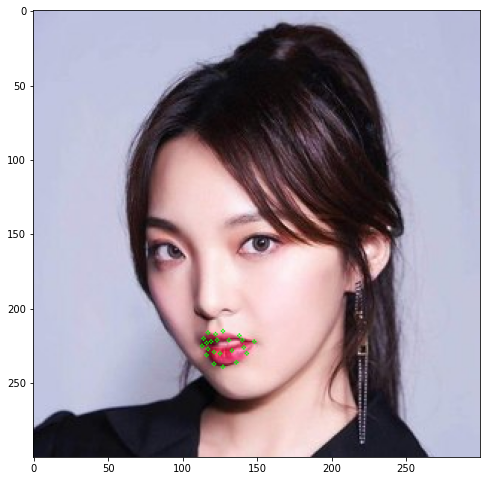

In [150]:
plt.figure(figsize=(8,12))
plt.imshow(img)

In [152]:
"""
https://console.cloud.tencent.com/
api/explorer?Product=iai&Version=2020-03-03&Action=AnalyzeDenseLandmarks&SignVersion=
"""
import json
from tencentcloud.common import credential
from tencentcloud.common.profile.client_profile import ClientProfile
from tencentcloud.common.profile.http_profile import HttpProfile
from tencentcloud.common.exception.tencent_cloud_sdk_exception import TencentCloudSDKException
from tencentcloud.iai.v20200303 import iai_client, models
try: 
    cred = credential.Credential("SecretId", "SecretKey") 
    httpProfile = HttpProfile()
    cred = credential.Credential(SecretId, SecretKey) 

    clientProfile = ClientProfile()
    clientProfile.httpProfile = httpProfile
    client = iai_client.IaiClient(cred, "ap-beijing", clientProfile) 
    with open("./images/test2.jpg","rb") as file:
        img=base64.b64encode(file.read()) 
    req = models.AnalyzeDenseLandmarksRequest()
    params = {
        "Image": str(img, encoding='utf-8'), 
        "Mode": 0,
        "NeedRotateDetection": 0
    }
    req.from_json_string(json.dumps(params))

    resp = client.AnalyzeDenseLandmarks(req).to_json_string()
    resp=json.loads(resp)
    print(resp) 

except TencentCloudSDKException as err: 
    print(err) 

{'ImageWidth': 300, 'ImageHeight': 300, 'DenseFaceShapeSet': [{'X': 73, 'Y': 78, 'Width': 135, 'Height': 176, 'LeftEye': [{'X': 81, 'Y': 161}, {'X': 81, 'Y': 162}, {'X': 81, 'Y': 162}, {'X': 82, 'Y': 163}, {'X': 82, 'Y': 163}, {'X': 83, 'Y': 164}, {'X': 83, 'Y': 164}, {'X': 84, 'Y': 165}, {'X': 84, 'Y': 165}, {'X': 85, 'Y': 166}, {'X': 86, 'Y': 166}, {'X': 86, 'Y': 166}, {'X': 87, 'Y': 166}, {'X': 88, 'Y': 167}, {'X': 89, 'Y': 167}, {'X': 89, 'Y': 167}, {'X': 90, 'Y': 167}, {'X': 91, 'Y': 167}, {'X': 92, 'Y': 167}, {'X': 93, 'Y': 167}, {'X': 93, 'Y': 167}, {'X': 94, 'Y': 167}, {'X': 95, 'Y': 166}, {'X': 96, 'Y': 166}, {'X': 96, 'Y': 166}, {'X': 97, 'Y': 166}, {'X': 98, 'Y': 166}, {'X': 99, 'Y': 166}, {'X': 99, 'Y': 166}, {'X': 100, 'Y': 165}, {'X': 101, 'Y': 165}, {'X': 101, 'Y': 165}, {'X': 102, 'Y': 165}, {'X': 102, 'Y': 164}, {'X': 101, 'Y': 164}, {'X': 101, 'Y': 163}, {'X': 101, 'Y': 162}, {'X': 100, 'Y': 161}, {'X': 99, 'Y': 161}, {'X': 99, 'Y': 160}, {'X': 98, 'Y': 160}, {'X': 98

In [155]:
resp['DenseFaceShapeSet']
"""
X	Integer	人脸框左上角横坐标。
Y	Integer	人脸框左上角纵坐标。
Width	Integer	人脸框宽度。
Height	Integer	人脸框高度。
LeftEye	Array of Point	描述左侧眼睛轮廓的 XX 点。
RightEye	Array of Point	描述右侧眼睛轮廓的 XX 点。
LeftEyeBrow	Array of Point	描述左侧眉毛轮廓的 XX 点。
RightEyeBrow	Array of Point	描述右侧眉毛轮廓的 XX 点。
MouthOutside	Array of Point	描述外嘴巴轮廓的 XX 点， 从左侧开始逆时针返回。
MouthInside	Array of Point	描述内嘴巴轮廓的 XX 点，从左侧开始逆时针返回。
Nose	Array of Point	描述鼻子轮廓的 XX 点。
LeftPupil	Array of Point	左瞳孔轮廓的 XX 个点。
RightPupil	Array of Point	右瞳孔轮廓的 XX 个点。
CentralAxis	Array of Point	中轴线轮廓的 XX 个点。
Chin	Array of Point	下巴轮廓的 XX 个点。
LeftEyeBags	Array of Point	左眼袋的 XX 个点。
RightEyeBags	Array of Point	右眼袋的 XX 个点。
Forehead	Array of Point	额头的 XX 个点。
"""

[{'X': 73,
  'Y': 78,
  'Width': 135,
  'Height': 176,
  'LeftEye': [{'X': 81, 'Y': 161},
   {'X': 81, 'Y': 162},
   {'X': 81, 'Y': 162},
   {'X': 82, 'Y': 163},
   {'X': 82, 'Y': 163},
   {'X': 83, 'Y': 164},
   {'X': 83, 'Y': 164},
   {'X': 84, 'Y': 165},
   {'X': 84, 'Y': 165},
   {'X': 85, 'Y': 166},
   {'X': 86, 'Y': 166},
   {'X': 86, 'Y': 166},
   {'X': 87, 'Y': 166},
   {'X': 88, 'Y': 167},
   {'X': 89, 'Y': 167},
   {'X': 89, 'Y': 167},
   {'X': 90, 'Y': 167},
   {'X': 91, 'Y': 167},
   {'X': 92, 'Y': 167},
   {'X': 93, 'Y': 167},
   {'X': 93, 'Y': 167},
   {'X': 94, 'Y': 167},
   {'X': 95, 'Y': 166},
   {'X': 96, 'Y': 166},
   {'X': 96, 'Y': 166},
   {'X': 97, 'Y': 166},
   {'X': 98, 'Y': 166},
   {'X': 99, 'Y': 166},
   {'X': 99, 'Y': 166},
   {'X': 100, 'Y': 165},
   {'X': 101, 'Y': 165},
   {'X': 101, 'Y': 165},
   {'X': 102, 'Y': 165},
   {'X': 102, 'Y': 164},
   {'X': 101, 'Y': 164},
   {'X': 101, 'Y': 163},
   {'X': 101, 'Y': 162},
   {'X': 100, 'Y': 161},
   {'X': 99, 

In [168]:
MouthOutside=resp['DenseFaceShapeSet'][0]["MouthOutside"]
MouthInside=resp['DenseFaceShapeSet'][0]["MouthInside"]

In [169]:
img=plt.imread("./images/test2.jpg")
for lines in MouthOutside:
    # {'X': 113, 'Y': 225}
    center=(lines["X"],lines["Y"])
    cv2.circle(img, center, 1, (0, 255, 0))

In [170]:
for lines in MouthInside:
    # {'X': 113, 'Y': 225}
    center=(lines["X"],lines["Y"])
    cv2.circle(img, center, 1, (0, 0, 255))

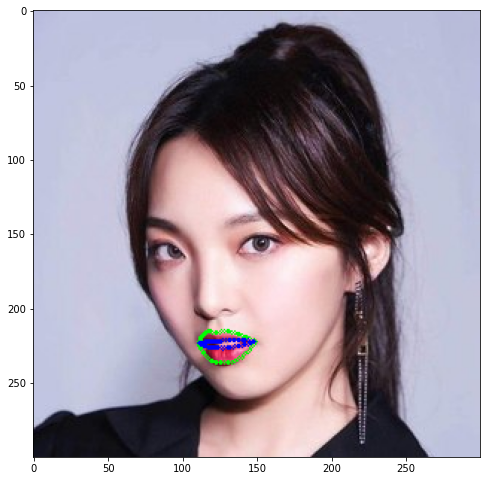

In [172]:
plt.figure(figsize=(8,12))
plt.imshow(img)